In [1]:
learning_rate = 0.01
num_steps = 20
batch_size = 20
total_numbers = 291
display_step = 1000
examples_to_show = 10
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing
# Network Parameters
num_hidden_1 = 512 # 1st layer num features
num_hidden_2 = 256
num_hidden_3 = 128
num_hidden_4 = 64# 2nd layer num features (the latent dim)
num_input = 32
num_classes = 3

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])


weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_3])),
    'encoder_h4': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_4])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_4, num_hidden_3])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_3, num_hidden_2])),
    'decoder_h3': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h4': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
    'classifier_h': tf.Variable(tf.random_normal([num_hidden_4, num_classes])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([num_hidden_3])),
    'encoder_b4': tf.Variable(tf.random_normal([num_hidden_4])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_3])),
    'decoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b3': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b4': tf.Variable(tf.random_normal([num_input])),
    'classifier_b': tf.Variable(tf.random_normal([num_classes])),
}

In [2]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                   biases['encoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['encoder_h4']),
                                   biases['encoder_b4']))
    
    return layer_4


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                   biases['decoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                   biases['decoder_b4']))
    return layer_4

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op

label_pred = tf.nn.softmax(tf.add(tf.matmul(encoder_op, weights['classifier_h']), biases['classifier_b']))
y_clipped = tf.clip_by_value(label_pred, 1e-10, 0.9999999)


# Targets (Labels) are the input data.
y_true = X
label_true = Y

# Define loss and optimizer, minimize the squared error
loss_autoencoder = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
cross_entropy_loss = -tf.reduce_mean(tf.reduce_sum(label_true * tf.log(y_clipped)
                         + (1 - label_true) * tf.log(1 - y_clipped), axis=1))
loss_total = loss_autoencoder+cross_entropy_loss

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_total)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [3]:
from numpy import genfromtxt
X_tr = genfromtxt('./NewDataForBiplab/DataRabi2017-2018/Train_2017-2018Rabi_NDVI.csv', delimiter=',')
X_te = genfromtxt('./NewDataForBiplab/DataRabi2017-2018/Test_2017-2018Rabi_NDVI.csv', delimiter=',')
data1 = genfromtxt('./NewDataForBiplab/DataRabi2017-2018/Train_2017-2018Rabi_Gamma_VH.csv', delimiter=',')
data2 = genfromtxt('./NewDataForBiplab/DataRabi2017-2018/Test_2017-2018Rabi_Gamma_VH.csv', delimiter=',')

In [4]:
X_tr = X_tr[1:,:]
X_te = X_te[1:,:]
data1 = data1[1:,:]
data2 = data2[1:,:]
print(X_tr.shape)
print(X_te.shape)

(240, 20)
(61, 20)


In [5]:
print(X_tr.max())
print(X_te.max())

119.250652688249
54.2852080730307


In [6]:
import numpy as np
from scipy import stats
data1 = np.array(data1)
data2 = np.array(data2)
X_tr = np.array(X_tr)
X_te = np.array(X_te)

data1 = 10*np.log10(data1)
data2 = 10*np.log10(data2)

print(data1.shape)
print(data2.shape)
print(X_tr.shape)

(240, 12)
(61, 12)
(240, 20)


In [7]:
import pandas
colnames = ['Latitude', 'Longitude', 'CropType','SampleYear','ShowingPeriod'
           , 'HarvestingPeriod', 'Others', 'Index']
data3 = pandas.read_csv('./NewDataForBiplab/DataRabi2017-2018/Train_FieldDataRabi2017-2018.csv', names=colnames)
data4 = pandas.read_csv('./NewDataForBiplab/DataRabi2017-2018/Test_FieldDataRabi2017-2018.csv', names=colnames)

In [8]:
ctype1 = data3.CropType.tolist()
ctype2 = data4.CropType.tolist()
print(ctype2)

['CType', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Wheat', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Sugarcane', 'Mustard', 'Mustard', 'Mustard', 'Mustard', 'Mustard', 'Mustard', 'Mustard', 'Mustard']


In [9]:
p = np.array(ctype1)
p1=  np.array(ctype2)
print(p.shape)
print(p1.shape)

(241,)
(62,)


In [10]:
lbl1 = ctype1
label = []
for i in range(1,241):
    if(lbl1[i] == "Wheat"):
        label += [0]
    if(lbl1[i] == "Sugarcane"):
        label += [1]
    if(lbl1[i] == "Mustard"):
        label += [2]
    
print(label)
y_tr=np.array(label)

lbl1 = ctype2
label = []
for i in range(1,62):
    if(lbl1[i] == "Wheat"):
        label += [0]
    if(lbl1[i] == "Sugarcane"):
        label += [1]
    if(lbl1[i] == "Mustard"):
        label += [2]
    
print(label)
y_te=np.array(label)
print()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]



In [11]:
X_tr = np.concatenate((X_tr,data1), axis=1)
X_te = np.concatenate((X_te,data2), axis=1)

In [12]:
X_tr = preprocessing.scale(X_tr)
X_te = preprocessing.scale(X_te)
print(X_tr.shape)

(240, 32)


In [13]:
x1=[]
x2=[]
x3=[]
l1=[]
l2=[]
l3=[]
for i in range(0, y_te.shape[0]):
    if(y_te[i]==0):
        x1.append(X_te[i])
        l1.append([1,0,0])
    if(y_te[i]==1):
        x2.append(X_te[i])
        l2.append([0,1,0])
    if(y_te[i]==2):
        x3.append(X_te[i])
        l3.append([0,0,1])
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
l1=np.array(l1)
l2=np.array(l2)
l3=np.array(l3)

print(l2.shape)

(29, 3)


In [14]:
from sklearn.utils import shuffle
X_tr, y_tr = shuffle(X_tr, y_tr, random_state = 0)
X_te, y_te = shuffle(X_te, y_te, random_state = 0)

In [15]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(240, 32)
(61, 32)
(240,)
(61,)


In [16]:
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_te)
y_train = np_utils.to_categorical(y_tr)
print(y_train.shape)
print(y_test.shape)

(240, 3)
(61, 3)


/home/aniruddha/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)
batch_size = 16
num_batch = 27

loss_arr=[]

# Training
for i in range(0,5000):
    k = 0 
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    avg_cost = 0
    for j in (0,num_batch):
        batch_x = X_tr[k:k+batch_size,:]
        batch_y = y_train[k:k+batch_size,:]
        k += batch_size

    # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss_total], feed_dict={X: batch_x, Y: batch_y})
        avg_cost += l / num_batch
    print("Epoch:", (i + 1), "cost =", "{:.8f}".format(avg_cost))
    loss_arr.append(avg_cost)
    
loss_arr=np.array(loss_arr)

Epoch: 1 cost = 0.37107757
Epoch: 2 cost = 0.30849259
Epoch: 3 cost = 0.26998988
Epoch: 4 cost = 0.24024978
Epoch: 5 cost = 0.21848554
Epoch: 6 cost = 0.20256149
Epoch: 7 cost = 0.19027555
Epoch: 8 cost = 0.18054099
Epoch: 9 cost = 0.17265126
Epoch: 10 cost = 0.16613319
Epoch: 11 cost = 0.16065825
Epoch: 12 cost = 0.15599600
Epoch: 13 cost = 0.15198851
Epoch: 14 cost = 0.14852260
Epoch: 15 cost = 0.14550946
Epoch: 16 cost = 0.14287470
Epoch: 17 cost = 0.14055474
Epoch: 18 cost = 0.13849562
Epoch: 19 cost = 0.13665258
Epoch: 20 cost = 0.13498878
Epoch: 21 cost = 0.13347445
Epoch: 22 cost = 0.13208560
Epoch: 23 cost = 0.13080300
Epoch: 24 cost = 0.12961098
Epoch: 25 cost = 0.12849690
Epoch: 26 cost = 0.12745041
Epoch: 27 cost = 0.12646310
Epoch: 28 cost = 0.12552818
Epoch: 29 cost = 0.12464030
Epoch: 30 cost = 0.12379527
Epoch: 31 cost = 0.12298969
Epoch: 32 cost = 0.12222086
Epoch: 33 cost = 0.12148632
Epoch: 34 cost = 0.12078387
Epoch: 35 cost = 0.12011151
Epoch: 36 cost = 0.11946741
E

Epoch: 309 cost = 0.09043941
Epoch: 310 cost = 0.09041803
Epoch: 311 cost = 0.09039678
Epoch: 312 cost = 0.09037570
Epoch: 313 cost = 0.09035476
Epoch: 314 cost = 0.09033396
Epoch: 315 cost = 0.09031329
Epoch: 316 cost = 0.09029275
Epoch: 317 cost = 0.09027233
Epoch: 318 cost = 0.09025201
Epoch: 319 cost = 0.09023179
Epoch: 320 cost = 0.09021163
Epoch: 321 cost = 0.09019153
Epoch: 322 cost = 0.09017150
Epoch: 323 cost = 0.09015148
Epoch: 324 cost = 0.09013147
Epoch: 325 cost = 0.09011146
Epoch: 326 cost = 0.09009143
Epoch: 327 cost = 0.09007136
Epoch: 328 cost = 0.09005123
Epoch: 329 cost = 0.09003105
Epoch: 330 cost = 0.09001082
Epoch: 331 cost = 0.08999052
Epoch: 332 cost = 0.08997018
Epoch: 333 cost = 0.08994979
Epoch: 334 cost = 0.08992940
Epoch: 335 cost = 0.08990901
Epoch: 336 cost = 0.08988868
Epoch: 337 cost = 0.08986842
Epoch: 338 cost = 0.08984831
Epoch: 339 cost = 0.08982833
Epoch: 340 cost = 0.08980856
Epoch: 341 cost = 0.08978899
Epoch: 342 cost = 0.08976968
Epoch: 343 cos

Epoch: 600 cost = 0.08713701
Epoch: 601 cost = 0.08713029
Epoch: 602 cost = 0.08712361
Epoch: 603 cost = 0.08711695
Epoch: 604 cost = 0.08711030
Epoch: 605 cost = 0.08710368
Epoch: 606 cost = 0.08709709
Epoch: 607 cost = 0.08709051
Epoch: 608 cost = 0.08708395
Epoch: 609 cost = 0.08707741
Epoch: 610 cost = 0.08707088
Epoch: 611 cost = 0.08706436
Epoch: 612 cost = 0.08705786
Epoch: 613 cost = 0.08705136
Epoch: 614 cost = 0.08704488
Epoch: 615 cost = 0.08703840
Epoch: 616 cost = 0.08703193
Epoch: 617 cost = 0.08702547
Epoch: 618 cost = 0.08701900
Epoch: 619 cost = 0.08701254
Epoch: 620 cost = 0.08700608
Epoch: 621 cost = 0.08699962
Epoch: 622 cost = 0.08699316
Epoch: 623 cost = 0.08698668
Epoch: 624 cost = 0.08698022
Epoch: 625 cost = 0.08697374
Epoch: 626 cost = 0.08696727
Epoch: 627 cost = 0.08696078
Epoch: 628 cost = 0.08695429
Epoch: 629 cost = 0.08694779
Epoch: 630 cost = 0.08694128
Epoch: 631 cost = 0.08693477
Epoch: 632 cost = 0.08692826
Epoch: 633 cost = 0.08692174
Epoch: 634 cos

Epoch: 898 cost = 0.08585641
Epoch: 899 cost = 0.08585316
Epoch: 900 cost = 0.08584986
Epoch: 901 cost = 0.08584653
Epoch: 902 cost = 0.08584317
Epoch: 903 cost = 0.08583977
Epoch: 904 cost = 0.08583633
Epoch: 905 cost = 0.08583283
Epoch: 906 cost = 0.08582930
Epoch: 907 cost = 0.08582573
Epoch: 908 cost = 0.08582212
Epoch: 909 cost = 0.08581845
Epoch: 910 cost = 0.08581473
Epoch: 911 cost = 0.08581097
Epoch: 912 cost = 0.08580714
Epoch: 913 cost = 0.08580327
Epoch: 914 cost = 0.08579935
Epoch: 915 cost = 0.08579537
Epoch: 916 cost = 0.08579134
Epoch: 917 cost = 0.08578728
Epoch: 918 cost = 0.08578315
Epoch: 919 cost = 0.08577900
Epoch: 920 cost = 0.08577480
Epoch: 921 cost = 0.08577057
Epoch: 922 cost = 0.08576631
Epoch: 923 cost = 0.08576202
Epoch: 924 cost = 0.08575771
Epoch: 925 cost = 0.08575341
Epoch: 926 cost = 0.08574910
Epoch: 927 cost = 0.08574479
Epoch: 928 cost = 0.08574049
Epoch: 929 cost = 0.08573621
Epoch: 930 cost = 0.08573198
Epoch: 931 cost = 0.08572776
Epoch: 932 cos

Epoch: 1185 cost = 0.08508219
Epoch: 1186 cost = 0.08507995
Epoch: 1187 cost = 0.08507772
Epoch: 1188 cost = 0.08507552
Epoch: 1189 cost = 0.08507335
Epoch: 1190 cost = 0.08507118
Epoch: 1191 cost = 0.08506903
Epoch: 1192 cost = 0.08506691
Epoch: 1193 cost = 0.08506482
Epoch: 1194 cost = 0.08506272
Epoch: 1195 cost = 0.08506065
Epoch: 1196 cost = 0.08505859
Epoch: 1197 cost = 0.08505656
Epoch: 1198 cost = 0.08505454
Epoch: 1199 cost = 0.08505252
Epoch: 1200 cost = 0.08505052
Epoch: 1201 cost = 0.08504854
Epoch: 1202 cost = 0.08504657
Epoch: 1203 cost = 0.08504461
Epoch: 1204 cost = 0.08504267
Epoch: 1205 cost = 0.08504073
Epoch: 1206 cost = 0.08503882
Epoch: 1207 cost = 0.08503690
Epoch: 1208 cost = 0.08503500
Epoch: 1209 cost = 0.08503312
Epoch: 1210 cost = 0.08503124
Epoch: 1211 cost = 0.08502937
Epoch: 1212 cost = 0.08502751
Epoch: 1213 cost = 0.08502567
Epoch: 1214 cost = 0.08502383
Epoch: 1215 cost = 0.08502200
Epoch: 1216 cost = 0.08502018
Epoch: 1217 cost = 0.08501837
Epoch: 121

Epoch: 1479 cost = 0.08459586
Epoch: 1480 cost = 0.08459409
Epoch: 1481 cost = 0.08459233
Epoch: 1482 cost = 0.08459059
Epoch: 1483 cost = 0.08458886
Epoch: 1484 cost = 0.08458713
Epoch: 1485 cost = 0.08458542
Epoch: 1486 cost = 0.08458372
Epoch: 1487 cost = 0.08458203
Epoch: 1488 cost = 0.08458036
Epoch: 1489 cost = 0.08457870
Epoch: 1490 cost = 0.08457704
Epoch: 1491 cost = 0.08457539
Epoch: 1492 cost = 0.08457375
Epoch: 1493 cost = 0.08457213
Epoch: 1494 cost = 0.08457051
Epoch: 1495 cost = 0.08456891
Epoch: 1496 cost = 0.08456732
Epoch: 1497 cost = 0.08456573
Epoch: 1498 cost = 0.08456416
Epoch: 1499 cost = 0.08456259
Epoch: 1500 cost = 0.08456103
Epoch: 1501 cost = 0.08455948
Epoch: 1502 cost = 0.08455795
Epoch: 1503 cost = 0.08455642
Epoch: 1504 cost = 0.08455489
Epoch: 1505 cost = 0.08455337
Epoch: 1506 cost = 0.08455187
Epoch: 1507 cost = 0.08455038
Epoch: 1508 cost = 0.08454888
Epoch: 1509 cost = 0.08454740
Epoch: 1510 cost = 0.08454593
Epoch: 1511 cost = 0.08454446
Epoch: 151

Epoch: 1767 cost = 0.08423498
Epoch: 1768 cost = 0.08423374
Epoch: 1769 cost = 0.08423251
Epoch: 1770 cost = 0.08423128
Epoch: 1771 cost = 0.08423003
Epoch: 1772 cost = 0.08422879
Epoch: 1773 cost = 0.08422756
Epoch: 1774 cost = 0.08422631
Epoch: 1775 cost = 0.08422506
Epoch: 1776 cost = 0.08422381
Epoch: 1777 cost = 0.08422256
Epoch: 1778 cost = 0.08422131
Epoch: 1779 cost = 0.08422006
Epoch: 1780 cost = 0.08421881
Epoch: 1781 cost = 0.08421755
Epoch: 1782 cost = 0.08421630
Epoch: 1783 cost = 0.08421503
Epoch: 1784 cost = 0.08421377
Epoch: 1785 cost = 0.08421251
Epoch: 1786 cost = 0.08421123
Epoch: 1787 cost = 0.08420997
Epoch: 1788 cost = 0.08420871
Epoch: 1789 cost = 0.08420742
Epoch: 1790 cost = 0.08420615
Epoch: 1791 cost = 0.08420486
Epoch: 1792 cost = 0.08420359
Epoch: 1793 cost = 0.08420231
Epoch: 1794 cost = 0.08420103
Epoch: 1795 cost = 0.08419973
Epoch: 1796 cost = 0.08419844
Epoch: 1797 cost = 0.08419715
Epoch: 1798 cost = 0.08419586
Epoch: 1799 cost = 0.08419456
Epoch: 180

Epoch: 2057 cost = 0.08378377
Epoch: 2058 cost = 0.08378238
Epoch: 2059 cost = 0.08378100
Epoch: 2060 cost = 0.08377963
Epoch: 2061 cost = 0.08377826
Epoch: 2062 cost = 0.08377690
Epoch: 2063 cost = 0.08377556
Epoch: 2064 cost = 0.08377421
Epoch: 2065 cost = 0.08377288
Epoch: 2066 cost = 0.08377156
Epoch: 2067 cost = 0.08377023
Epoch: 2068 cost = 0.08376892
Epoch: 2069 cost = 0.08376761
Epoch: 2070 cost = 0.08376631
Epoch: 2071 cost = 0.08376502
Epoch: 2072 cost = 0.08376373
Epoch: 2073 cost = 0.08376245
Epoch: 2074 cost = 0.08376117
Epoch: 2075 cost = 0.08375990
Epoch: 2076 cost = 0.08375865
Epoch: 2077 cost = 0.08375739
Epoch: 2078 cost = 0.08375614
Epoch: 2079 cost = 0.08375489
Epoch: 2080 cost = 0.08375365
Epoch: 2081 cost = 0.08375242
Epoch: 2082 cost = 0.08375120
Epoch: 2083 cost = 0.08374997
Epoch: 2084 cost = 0.08374876
Epoch: 2085 cost = 0.08374755
Epoch: 2086 cost = 0.08374634
Epoch: 2087 cost = 0.08374514
Epoch: 2088 cost = 0.08374395
Epoch: 2089 cost = 0.08374276
Epoch: 209

Epoch: 2351 cost = 0.08351802
Epoch: 2352 cost = 0.08351723
Epoch: 2353 cost = 0.08351644
Epoch: 2354 cost = 0.08351564
Epoch: 2355 cost = 0.08351484
Epoch: 2356 cost = 0.08351403
Epoch: 2357 cost = 0.08351323
Epoch: 2358 cost = 0.08351242
Epoch: 2359 cost = 0.08351161
Epoch: 2360 cost = 0.08351080
Epoch: 2361 cost = 0.08350998
Epoch: 2362 cost = 0.08350915
Epoch: 2363 cost = 0.08350833
Epoch: 2364 cost = 0.08350749
Epoch: 2365 cost = 0.08350665
Epoch: 2366 cost = 0.08350582
Epoch: 2367 cost = 0.08350498
Epoch: 2368 cost = 0.08350413
Epoch: 2369 cost = 0.08350328
Epoch: 2370 cost = 0.08350243
Epoch: 2371 cost = 0.08350157
Epoch: 2372 cost = 0.08350070
Epoch: 2373 cost = 0.08349983
Epoch: 2374 cost = 0.08349896
Epoch: 2375 cost = 0.08349808
Epoch: 2376 cost = 0.08349721
Epoch: 2377 cost = 0.08349632
Epoch: 2378 cost = 0.08349542
Epoch: 2379 cost = 0.08349453
Epoch: 2380 cost = 0.08349363
Epoch: 2381 cost = 0.08349272
Epoch: 2382 cost = 0.08349181
Epoch: 2383 cost = 0.08349089
Epoch: 238

Epoch: 2637 cost = 0.08331466
Epoch: 2638 cost = 0.08331419
Epoch: 2639 cost = 0.08331374
Epoch: 2640 cost = 0.08331328
Epoch: 2641 cost = 0.08331281
Epoch: 2642 cost = 0.08331237
Epoch: 2643 cost = 0.08331190
Epoch: 2644 cost = 0.08331144
Epoch: 2645 cost = 0.08331098
Epoch: 2646 cost = 0.08331053
Epoch: 2647 cost = 0.08331008
Epoch: 2648 cost = 0.08330963
Epoch: 2649 cost = 0.08330918
Epoch: 2650 cost = 0.08330872
Epoch: 2651 cost = 0.08330828
Epoch: 2652 cost = 0.08330783
Epoch: 2653 cost = 0.08330738
Epoch: 2654 cost = 0.08330693
Epoch: 2655 cost = 0.08330648
Epoch: 2656 cost = 0.08330604
Epoch: 2657 cost = 0.08330559
Epoch: 2658 cost = 0.08330515
Epoch: 2659 cost = 0.08330470
Epoch: 2660 cost = 0.08330426
Epoch: 2661 cost = 0.08330382
Epoch: 2662 cost = 0.08330338
Epoch: 2663 cost = 0.08330293
Epoch: 2664 cost = 0.08330248
Epoch: 2665 cost = 0.08330206
Epoch: 2666 cost = 0.08330162
Epoch: 2667 cost = 0.08330118
Epoch: 2668 cost = 0.08330075
Epoch: 2669 cost = 0.08330031
Epoch: 267

Epoch: 2952 cost = 0.08318928
Epoch: 2953 cost = 0.08318888
Epoch: 2954 cost = 0.08318850
Epoch: 2955 cost = 0.08318811
Epoch: 2956 cost = 0.08318771
Epoch: 2957 cost = 0.08318732
Epoch: 2958 cost = 0.08318692
Epoch: 2959 cost = 0.08318653
Epoch: 2960 cost = 0.08318613
Epoch: 2961 cost = 0.08318574
Epoch: 2962 cost = 0.08318534
Epoch: 2963 cost = 0.08318495
Epoch: 2964 cost = 0.08318456
Epoch: 2965 cost = 0.08318416
Epoch: 2966 cost = 0.08318377
Epoch: 2967 cost = 0.08318338
Epoch: 2968 cost = 0.08318299
Epoch: 2969 cost = 0.08318259
Epoch: 2970 cost = 0.08318219
Epoch: 2971 cost = 0.08318180
Epoch: 2972 cost = 0.08318142
Epoch: 2973 cost = 0.08318102
Epoch: 2974 cost = 0.08318063
Epoch: 2975 cost = 0.08318024
Epoch: 2976 cost = 0.08317984
Epoch: 2977 cost = 0.08317946
Epoch: 2978 cost = 0.08317905
Epoch: 2979 cost = 0.08317867
Epoch: 2980 cost = 0.08317827
Epoch: 2981 cost = 0.08317788
Epoch: 2982 cost = 0.08317748
Epoch: 2983 cost = 0.08317710
Epoch: 2984 cost = 0.08317671
Epoch: 298

Epoch: 3267 cost = 0.08306089
Epoch: 3268 cost = 0.08306027
Epoch: 3269 cost = 0.08305964
Epoch: 3270 cost = 0.08305901
Epoch: 3271 cost = 0.08305836
Epoch: 3272 cost = 0.08305772
Epoch: 3273 cost = 0.08305707
Epoch: 3274 cost = 0.08305641
Epoch: 3275 cost = 0.08305575
Epoch: 3276 cost = 0.08305508
Epoch: 3277 cost = 0.08305439
Epoch: 3278 cost = 0.08305371
Epoch: 3279 cost = 0.08305302
Epoch: 3280 cost = 0.08305232
Epoch: 3281 cost = 0.08305161
Epoch: 3282 cost = 0.08305090
Epoch: 3283 cost = 0.08305017
Epoch: 3284 cost = 0.08304945
Epoch: 3285 cost = 0.08304871
Epoch: 3286 cost = 0.08304796
Epoch: 3287 cost = 0.08304721
Epoch: 3288 cost = 0.08304645
Epoch: 3289 cost = 0.08304567
Epoch: 3290 cost = 0.08304489
Epoch: 3291 cost = 0.08304411
Epoch: 3292 cost = 0.08304331
Epoch: 3293 cost = 0.08304250
Epoch: 3294 cost = 0.08304167
Epoch: 3295 cost = 0.08304084
Epoch: 3296 cost = 0.08304000
Epoch: 3297 cost = 0.08303915
Epoch: 3298 cost = 0.08303829
Epoch: 3299 cost = 0.08303741
Epoch: 330

Epoch: 3547 cost = 0.08270440
Epoch: 3548 cost = 0.08270342
Epoch: 3549 cost = 0.08270244
Epoch: 3550 cost = 0.08270146
Epoch: 3551 cost = 0.08270050
Epoch: 3552 cost = 0.08269954
Epoch: 3553 cost = 0.08269857
Epoch: 3554 cost = 0.08269763
Epoch: 3555 cost = 0.08269668
Epoch: 3556 cost = 0.08269573
Epoch: 3557 cost = 0.08269480
Epoch: 3558 cost = 0.08269385
Epoch: 3559 cost = 0.08269292
Epoch: 3560 cost = 0.08269200
Epoch: 3561 cost = 0.08269108
Epoch: 3562 cost = 0.08269016
Epoch: 3563 cost = 0.08268926
Epoch: 3564 cost = 0.08268835
Epoch: 3565 cost = 0.08268746
Epoch: 3566 cost = 0.08268656
Epoch: 3567 cost = 0.08268566
Epoch: 3568 cost = 0.08268478
Epoch: 3569 cost = 0.08268390
Epoch: 3570 cost = 0.08268303
Epoch: 3571 cost = 0.08268215
Epoch: 3572 cost = 0.08268129
Epoch: 3573 cost = 0.08268042
Epoch: 3574 cost = 0.08267957
Epoch: 3575 cost = 0.08267872
Epoch: 3576 cost = 0.08267787
Epoch: 3577 cost = 0.08267704
Epoch: 3578 cost = 0.08267620
Epoch: 3579 cost = 0.08267537
Epoch: 358

Epoch: 3832 cost = 0.08253513
Epoch: 3833 cost = 0.08253463
Epoch: 3834 cost = 0.08253412
Epoch: 3835 cost = 0.08253361
Epoch: 3836 cost = 0.08253311
Epoch: 3837 cost = 0.08253259
Epoch: 3838 cost = 0.08253208
Epoch: 3839 cost = 0.08253157
Epoch: 3840 cost = 0.08253106
Epoch: 3841 cost = 0.08253054
Epoch: 3842 cost = 0.08253003
Epoch: 3843 cost = 0.08252951
Epoch: 3844 cost = 0.08252899
Epoch: 3845 cost = 0.08252847
Epoch: 3846 cost = 0.08252795
Epoch: 3847 cost = 0.08252743
Epoch: 3848 cost = 0.08252691
Epoch: 3849 cost = 0.08252638
Epoch: 3850 cost = 0.08252585
Epoch: 3851 cost = 0.08252533
Epoch: 3852 cost = 0.08252481
Epoch: 3853 cost = 0.08252428
Epoch: 3854 cost = 0.08252375
Epoch: 3855 cost = 0.08252320
Epoch: 3856 cost = 0.08252267
Epoch: 3857 cost = 0.08252214
Epoch: 3858 cost = 0.08252160
Epoch: 3859 cost = 0.08252106
Epoch: 3860 cost = 0.08252052
Epoch: 3861 cost = 0.08251998
Epoch: 3862 cost = 0.08251943
Epoch: 3863 cost = 0.08251888
Epoch: 3864 cost = 0.08251834
Epoch: 386

Epoch: 4123 cost = 0.08236358
Epoch: 4124 cost = 0.08236283
Epoch: 4125 cost = 0.08236207
Epoch: 4126 cost = 0.08236131
Epoch: 4127 cost = 0.08236055
Epoch: 4128 cost = 0.08235979
Epoch: 4129 cost = 0.08235901
Epoch: 4130 cost = 0.08235825
Epoch: 4131 cost = 0.08235749
Epoch: 4132 cost = 0.08235671
Epoch: 4133 cost = 0.08235594
Epoch: 4134 cost = 0.08235517
Epoch: 4135 cost = 0.08235439
Epoch: 4136 cost = 0.08235361
Epoch: 4137 cost = 0.08235284
Epoch: 4138 cost = 0.08235206
Epoch: 4139 cost = 0.08235127
Epoch: 4140 cost = 0.08235049
Epoch: 4141 cost = 0.08234972
Epoch: 4142 cost = 0.08234893
Epoch: 4143 cost = 0.08234815
Epoch: 4144 cost = 0.08234736
Epoch: 4145 cost = 0.08234657
Epoch: 4146 cost = 0.08234578
Epoch: 4147 cost = 0.08234500
Epoch: 4148 cost = 0.08234421
Epoch: 4149 cost = 0.08234342
Epoch: 4150 cost = 0.08234263
Epoch: 4151 cost = 0.08234185
Epoch: 4152 cost = 0.08234106
Epoch: 4153 cost = 0.08234027
Epoch: 4154 cost = 0.08233948
Epoch: 4155 cost = 0.08233870
Epoch: 415

Epoch: 4412 cost = 0.08216831
Epoch: 4413 cost = 0.08216767
Epoch: 4414 cost = 0.08216704
Epoch: 4415 cost = 0.08216640
Epoch: 4416 cost = 0.08216577
Epoch: 4417 cost = 0.08216514
Epoch: 4418 cost = 0.08216450
Epoch: 4419 cost = 0.08216387
Epoch: 4420 cost = 0.08216323
Epoch: 4421 cost = 0.08216261
Epoch: 4422 cost = 0.08216197
Epoch: 4423 cost = 0.08216132
Epoch: 4424 cost = 0.08216069
Epoch: 4425 cost = 0.08216006
Epoch: 4426 cost = 0.08215942
Epoch: 4427 cost = 0.08215880
Epoch: 4428 cost = 0.08215815
Epoch: 4429 cost = 0.08215751
Epoch: 4430 cost = 0.08215687
Epoch: 4431 cost = 0.08215623
Epoch: 4432 cost = 0.08215560
Epoch: 4433 cost = 0.08215496
Epoch: 4434 cost = 0.08215432
Epoch: 4435 cost = 0.08215367
Epoch: 4436 cost = 0.08215304
Epoch: 4437 cost = 0.08215240
Epoch: 4438 cost = 0.08215175
Epoch: 4439 cost = 0.08215111
Epoch: 4440 cost = 0.08215047
Epoch: 4441 cost = 0.08214982
Epoch: 4442 cost = 0.08214918
Epoch: 4443 cost = 0.08214853
Epoch: 4444 cost = 0.08214788
Epoch: 444

Epoch: 4705 cost = 0.08176002
Epoch: 4706 cost = 0.08175905
Epoch: 4707 cost = 0.08175807
Epoch: 4708 cost = 0.08175710
Epoch: 4709 cost = 0.08175614
Epoch: 4710 cost = 0.08175518
Epoch: 4711 cost = 0.08175422
Epoch: 4712 cost = 0.08175327
Epoch: 4713 cost = 0.08175232
Epoch: 4714 cost = 0.08175137
Epoch: 4715 cost = 0.08175041
Epoch: 4716 cost = 0.08174947
Epoch: 4717 cost = 0.08174853
Epoch: 4718 cost = 0.08174759
Epoch: 4719 cost = 0.08174666
Epoch: 4720 cost = 0.08174572
Epoch: 4721 cost = 0.08174479
Epoch: 4722 cost = 0.08174385
Epoch: 4723 cost = 0.08174292
Epoch: 4724 cost = 0.08174198
Epoch: 4725 cost = 0.08174105
Epoch: 4726 cost = 0.08174012
Epoch: 4727 cost = 0.08173918
Epoch: 4728 cost = 0.08173825
Epoch: 4729 cost = 0.08173732
Epoch: 4730 cost = 0.08173638
Epoch: 4731 cost = 0.08173545
Epoch: 4732 cost = 0.08173452
Epoch: 4733 cost = 0.08173358
Epoch: 4734 cost = 0.08173264
Epoch: 4735 cost = 0.08173170
Epoch: 4736 cost = 0.08173076
Epoch: 4737 cost = 0.08172981
Epoch: 473

Epoch: 4992 cost = 0.08121866
Epoch: 4993 cost = 0.08121770
Epoch: 4994 cost = 0.08121673
Epoch: 4995 cost = 0.08121579
Epoch: 4996 cost = 0.08121483
Epoch: 4997 cost = 0.08121388
Epoch: 4998 cost = 0.08121294
Epoch: 4999 cost = 0.08121200
Epoch: 5000 cost = 0.08121105


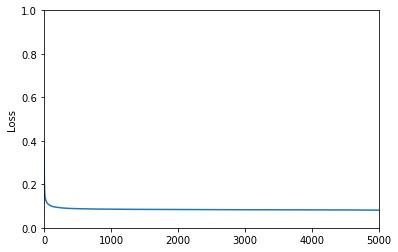

In [19]:
plt.plot(loss_arr)
plt.ylabel('Loss')
plt.axis([0, 5000, 0, 1])
plt.show()

In [20]:
# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(label_pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
print(y_test.shape)

(61, 3)


In [22]:
# on 1000 epoch
print(sess.run(accuracy, feed_dict={X: X_te, Y: y_test}))

0.7540983


In [46]:
res1=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x1, Y: l1}))
res2=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x2, Y: l2}))
res3=np.array(sess.run(tf.argmax(label_pred,1), feed_dict={X: x3, Y: l3}))
print(res1)
print(res2)
print(res3)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 1 1 0 2 1]


In [47]:
confusion=[]
x1=np.sum(np.equal(res1, 0))
x2=np.sum(np.equal(res1, 1))
x3=np.sum(np.equal(res1, 2))
confusion.append([x1,x2,x3])
x1=np.sum(np.equal(res2, 0))
x2=np.sum(np.equal(res2, 1))
x3=np.sum(np.equal(res2, 2))
confusion.append([x1,x2,x3])
x1=np.sum(np.equal(res3, 0))
x2=np.sum(np.equal(res3, 1))
x3=np.sum(np.equal(res3, 2))
confusion.append([x1,x2,x3])

confusion=np.array(confusion)
print(confusion)

[[23  1  0]
 [ 0 29  0]
 [ 1  3  4]]


In [23]:
#SVM Classifier
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix, cohen_kappa_score
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_tr, y_tr)  

y_pred = svclassifier.predict(X_te)  

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, y_pred)
print(accuracy)

0.9180327868852459


In [25]:
print(confusion_matrix(y_te,y_pred)) 
print(cohen_kappa_score(y_te, y_pred))

[[22  2  0]
 [ 0 29  0]
 [ 1  2  5]]
0.8595764272559853
